# **1. Perkenalan Dataset**

**Dataset**: Telco Customer Churn  
**Sumber**: IBM GitHub Repository  

**Deskripsi**: Dataset ini berisi informasi pelanggan perusahaan telekomunikasi. Tujuannya adalah memprediksi apakah pelanggan akan berhenti berlangganan (churn) atau tidak.

**Target**: Kolom 'Churn' (Yes/No)

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
print('Library berhasil diimport!')

Library berhasil diimport!


# **3. Memuat Dataset**

In [2]:
# Load dataset dari file CSV
df = pd.read_csv('../Telco-Customer-Churn.csv')
print(f'Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns')

Dataset loaded: 7043 rows, 21 columns


In [3]:
# Tampilkan 5 baris pertama
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **4. Exploratory Data Analysis (EDA)**

In [5]:
# Statistik deskriptif
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Cek missing values
missing = df.isnull().sum()
print('Missing values:')
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print('No missing values')

Missing values:
No missing values


In [7]:
# Distribusi target variable
print('Distribusi Churn:')
print(df['Churn'].value_counts())
print('\nPersentase:')
print(df['Churn'].value_counts(normalize=True) * 100)

Distribusi Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Persentase:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


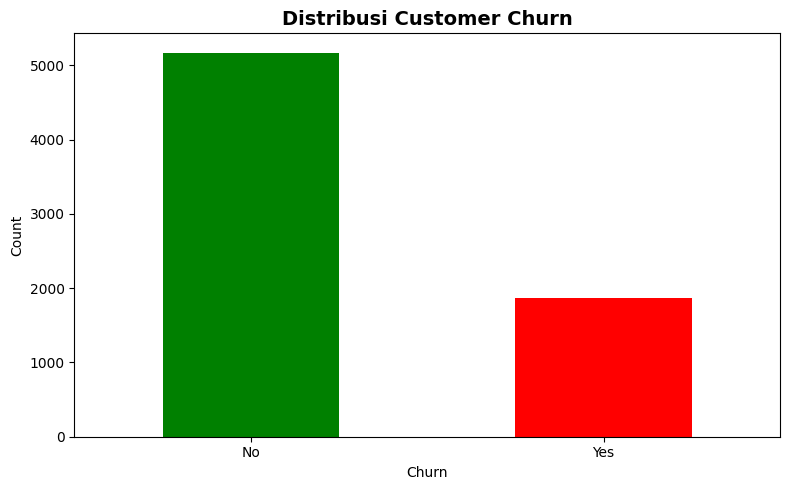

In [8]:
# Visualisasi distribusi Churn
plt.figure(figsize=(8, 5))
df['Churn'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribusi Customer Churn', fontsize=14, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

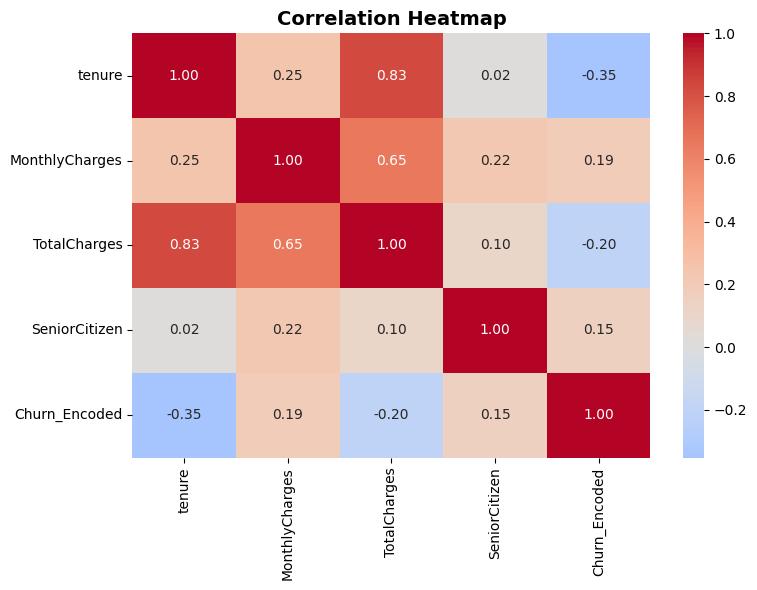

In [9]:
# Encode Churn untuk analisis korelasi
df['Churn_Encoded'] = df['Churn'].map({'No': 0, 'Yes': 1})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Korelasi dengan target
corr_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn_Encoded']
correlation = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

In [10]:
# Handle TotalCharges (convert to numeric and fill NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
print('TotalCharges processed')

TotalCharges processed


In [11]:
# Drop unnecessary columns
df_processed = df.drop(['customerID', 'Churn_Encoded'], axis=1)
print(f'Columns after drop: {df_processed.shape[1]}')

Columns after drop: 20


In [12]:
# Separate features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Encode target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
print(f'Target encoding: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}')

Target encoding: {'No': np.int64(0), 'Yes': np.int64(1)}


In [13]:
# Encode categorical features
X_encoded = X.copy()
categorical_cols = X_encoded.select_dtypes(include=['object']).columns

print(f'Encoding {len(categorical_cols)} categorical columns...')
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

print(f'Encoded {len(categorical_cols)} categorical columns')

Encoding 15 categorical columns...
Encoded 15 categorical columns


In [14]:
# Feature scaling
scaler = StandardScaler()
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_encoded[numeric_features] = scaler.fit_transform(X_encoded[numeric_features])
print('Feature scaling completed')

Feature scaling completed


In [15]:
# Save processed data
final_df = X_encoded.copy()
final_df['Churn'] = y_encoded
output_file = 'Telco-Customer-Churn-Processed.csv'
final_df.to_csv(output_file, index=False)
print(f'Data saved to: {output_file}')
print(f'Shape: {final_df.shape}')
print('\n📋 Summary:')
print(final_df.head())

Data saved to: Telco-Customer-Churn-Processed.csv
Shape: (7043, 20)

📋 Summary:
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0 